# Exploratory Data Analysis (EDA)

This notebook explores and summarizes the datasets:
- **Machine_Settings_Log_01.csv**
- **Production_Log_01.csv**

---

## 1. Imports and Settings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 2. Load the Data

In [3]:
# Update path if running elsewhere
machine = pd.read_csv('Machine_Settings_Log_01.csv')
production = pd.read_csv('Production_Log_01.csv')

print(f'Machine Settings shape: {machine.shape}')
print(f'Production Log shape: {production.shape}')

Machine Settings shape: (10000, 3)
Production Log shape: (10000, 20)


In [4]:
merged_df = pd.merge(machine, production, on='configuration_log_ID', how='inner')
merged_df.shape

(10000, 22)

In [5]:
merged_df_t = pd.merge(machine, production, on='configuration_log_ID', how='outer')
merged_df_t.shape

(10000, 22)

In [6]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   configuration_log_ID  10000 non-null  int64  
 1   gear                  10000 non-null  int64  
 2   rotation_speed        10000 non-null  float64
 3   id                    10000 non-null  int64  
 4   width                 10000 non-null  float64
 5   height                10000 non-null  float64
 6   ionizationclass       10000 non-null  object 
 7   FluxCompensation      10000 non-null  object 
 8   pressure              10000 non-null  float64
 9   karma                 10000 non-null  float64
 10  modulation            10000 non-null  float64
 11  weight_in_kg          10000 non-null  float64
 12  weight_in_g           10000 non-null  float64
 13  error                 10000 non-null  object 
 14  error_type            3365 non-null   object 
 15  Quality             

,configuration_log_ID,gear,rotation_speed,id,width,height,ionizationclass,FluxCompensation,pressure,karma,...,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multideminsionality,roughness
0,1,2,122.121415,1,137.419169,44.326218,C,IV,103.937207,976.538993,...,8.370683e+08,no,NaN,95.489138,703.193051,49.666361,139.496837,2964.217002,no,123.202181
1,2,1,111.977476,2,98.706037,41.619531,A,II,101.177877,1031.806826,...,4.355043e+08,no,NaN,98.262642,663.936149,52.826310,100.380138,2733.298369,yes,111.040858
2,3,1,137.268544,3,117.262568,41.421088,A,III,99.381956,840.246668,...,5.995707e+08,no,NaN,98.472489,674.814037,51.967423,115.995772,2716.279965,no,138.439571
3,4,2,125.719071,4,122.657252,41.202308,A,I,101.833664,964.391122,...,6.498897e+08,no,NaN,97.107023,661.281569,47.626823,121.383895,2694.883523,no,125.939831
4,5,1,134.710713,5,118.085366,43.418485,C,I,95.246304,859.331870,...,6.054444e+08,no,NaN,92.994235,684.026152,47.420237,118.633440,2885.260257,no,135.123613


In [10]:
print(merged_df['error'].value_counts())

error
no     6635
yes    3365
Name: count, dtype: int64


In [12]:
# Show unique values to see what error types exist
print(merged_df['error_type'].unique())


[nan 'severe' 'minor' 'critical']


In [15]:
# Fill missing/empty error_type with a label (e.g., 'No Error')
merged_df['error_type'] = merged_df['error_type'].replace('', pd.NA)
merged_df['error_type'] = merged_df['error_type'].fillna('No Error')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   configuration_log_ID  10000 non-null  int64  
 1   gear                  10000 non-null  int64  
 2   rotation_speed        10000 non-null  float64
 3   id                    10000 non-null  int64  
 4   width                 10000 non-null  float64
 5   height                10000 non-null  float64
 6   ionizationclass       10000 non-null  object 
 7   FluxCompensation      10000 non-null  object 
 8   pressure              10000 non-null  float64
 9   karma                 10000 non-null  float64
 10  modulation            10000 non-null  float64
 11  weight_in_kg          10000 non-null  float64
 12  weight_in_g           10000 non-null  float64
 13  error                 10000 non-null  object 
 14  error_type            10000 non-null  object 
 15  Quality             

/var/folders/lj/36924lnj39380jwmbklmk4hh0000gn/T/ipykernel_14874/2333294152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=errors_df, x='error_type', palette='viridis')


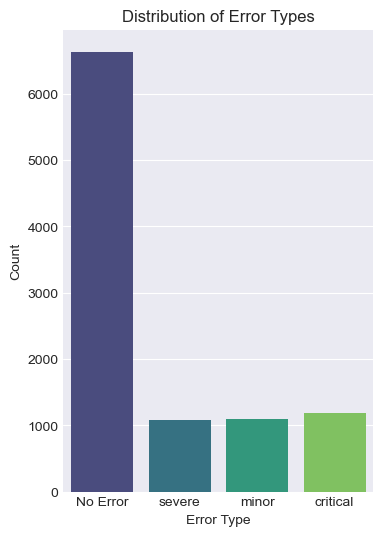

In [14]:
errors_df = merged_df[merged_df['error_type'].isin(['critical', 'severe', 'minor','No Error'])]
errors_df.shape
errors_df.info()
# Plotting the distribution of error types
plt.figure(figsize=(4, 6))
sns.countplot(data=errors_df, x='error_type', palette='viridis')
plt.title('Distribution of Error Types')
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.show()

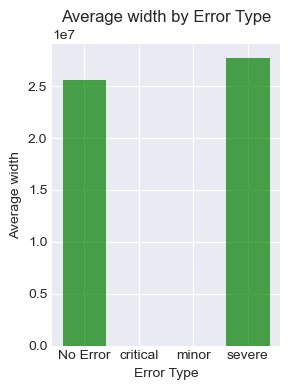

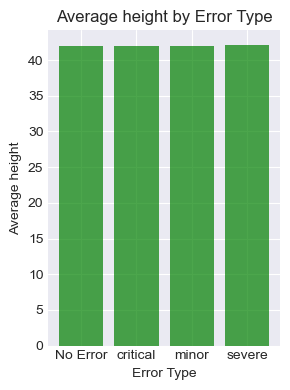

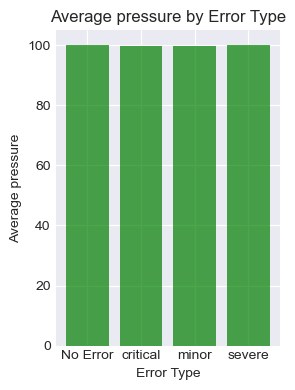

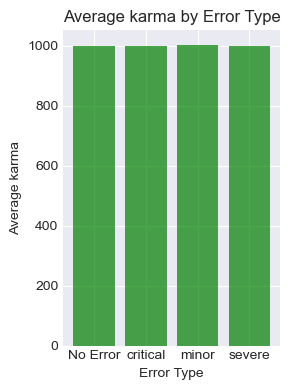

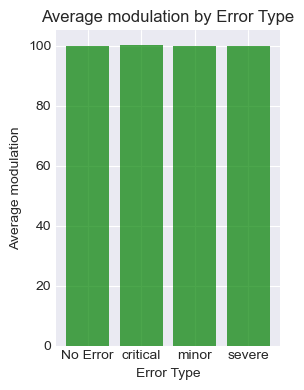

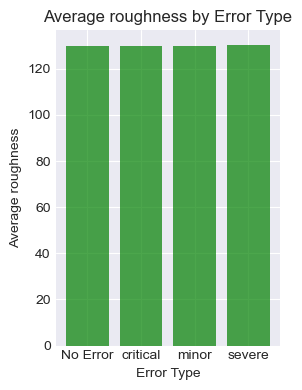

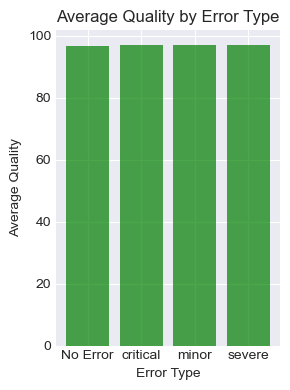

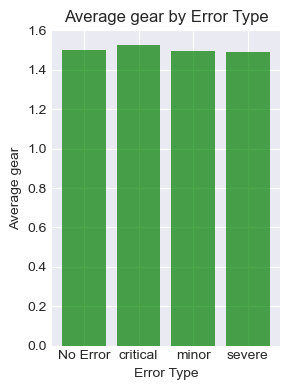

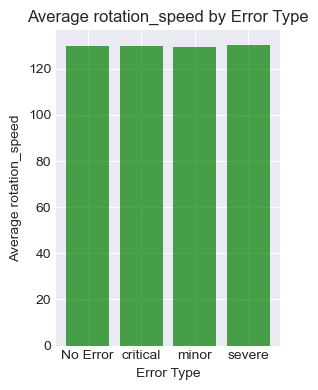

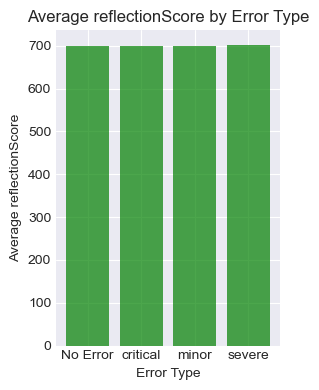

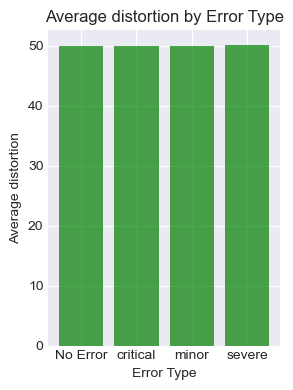

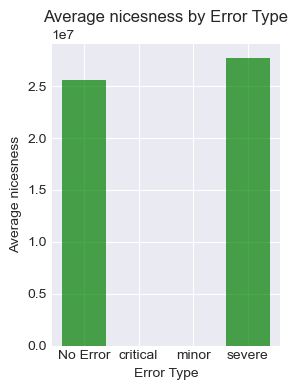

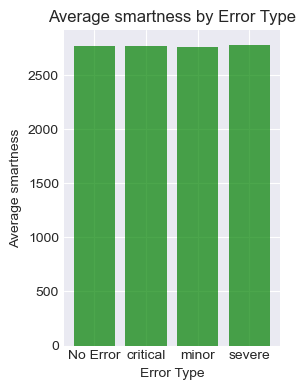

In [17]:
numeric_cols = ['width', 'height', 'pressure', 'karma', 'modulation', 'roughness', 'Quality', 'gear', 'rotation_speed','reflectionScore', 'distortion','nicesness','smartness']

# Convert columns to numeric (ignore errors)
for col in numeric_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')


# Plot means by error type (including No Error)
for col in numeric_cols:
    plt.figure(figsize=(3, 4))
    means = merged_df.groupby('error_type')[col].mean().reset_index()
    plt.bar(means['error_type'], means[col], color='green', alpha=0.7)
    plt.title(f'Average {col} by Error Type')
    plt.xlabel('Error Type')
    plt.ylabel(f'Average {col}')
    plt.tight_layout()
    plt.show()


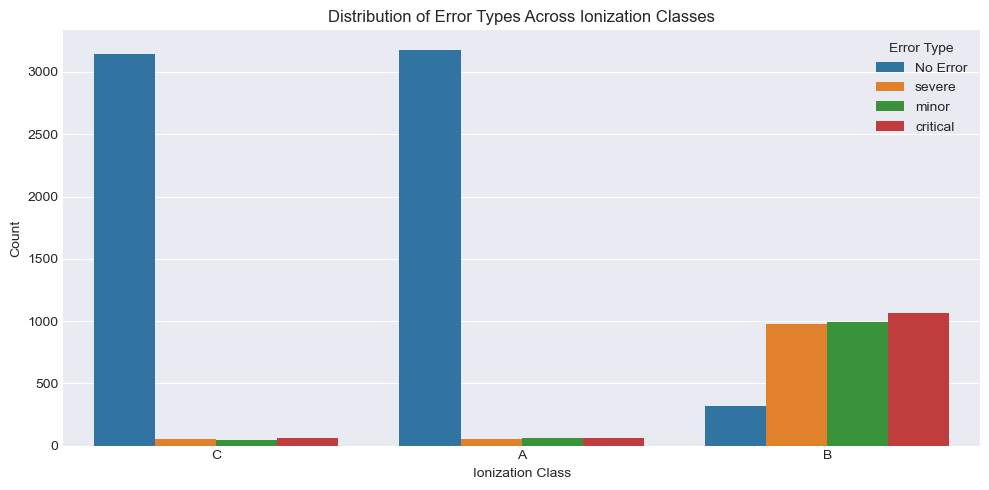

In [55]:

plt.figure(figsize=(10, 5))
sns.countplot(x='ionizationclass', hue='error_type', data=merged_df)
plt.title('Distribution of Error Types Across Ionization Classes')
plt.xlabel('Ionization Class')
plt.ylabel('Count')
plt.legend(title='Error Type')
plt.tight_layout()
plt.show()


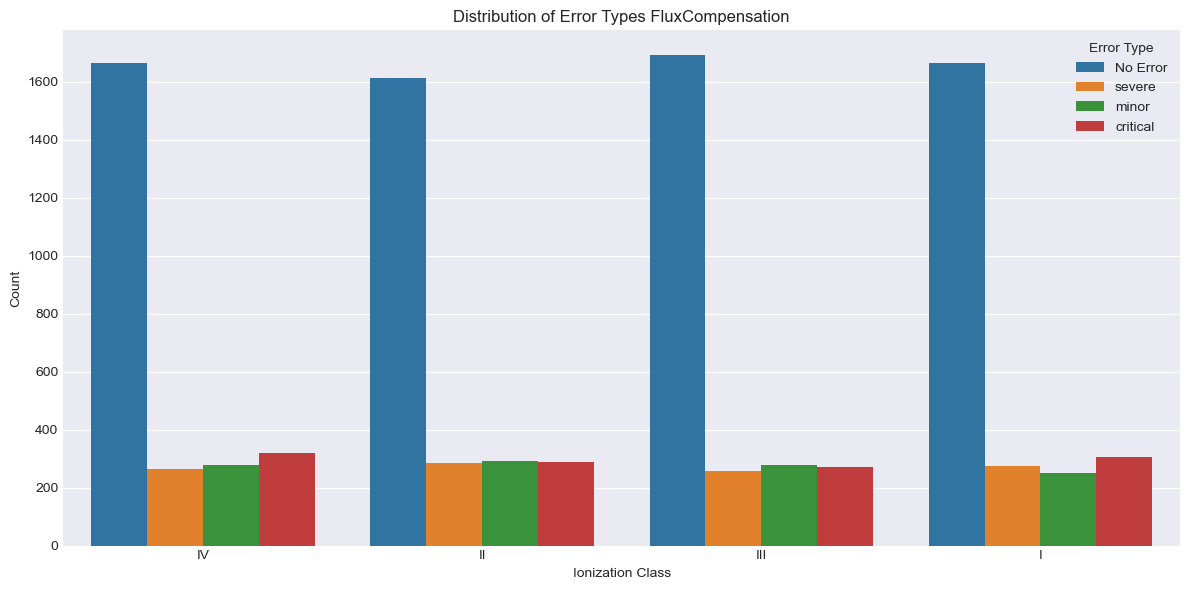

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(x='FluxCompensation', hue='error_type', data=merged_df)
plt.title('Distribution of Error Types FluxCompensation')
plt.xlabel('Ionization Class')
plt.ylabel('Count')
plt.legend(title='Error Type')
plt.tight_layout()
plt.show()

#### ML - Classification model - Random Forest Classifier 

In [31]:
from sklearn.preprocessing import LabelEncoder

# Copy your DataFrame to avoid changing the original, optional but safe
df_model = merged_df.copy()

# Handle missing values for categorical columns
df_model['ionizationclass'] = df_model['ionizationclass'].replace('', pd.NA).fillna('Unknown')
df_model['FluxCompensation'] = df_model['FluxCompensation'].replace('', pd.NA).fillna('Unknown')

# Label Encode both columns
for col in ['ionizationclass', 'FluxCompensation']:
    le_col = LabelEncoder()
    df_model[col] = le_col.fit_transform(df_model[col].astype(str))


In [32]:
features = ['width', 'height', 'pressure', 'karma', 'modulation', 'roughness',
            'Quality', 'gear', 'rotation_speed', 'ionizationclass', 'FluxCompensation']
target = 'error_type'


In [33]:
for col in ['width', 'height', 'pressure', 'karma', 'modulation', 'roughness', 'Quality', 'gear', 'rotation_speed']:
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')


In [35]:
df_model[target] = df_model[target].replace('', pd.NA).fillna('No Error')
df_model = df_model[features + [target]].dropna()


In [36]:
le_target = LabelEncoder()
df_model[target] = le_target.fit_transform(df_model[target])

X = df_model[features]
y = df_model[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))


Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

    No Error       0.94      0.95      0.95      1327
    critical       0.34      0.35      0.34       237
       minor       0.30      0.30      0.30       220
      severe       0.35      0.32      0.34       216

    accuracy                           0.74      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.74      0.74      0.74      2000



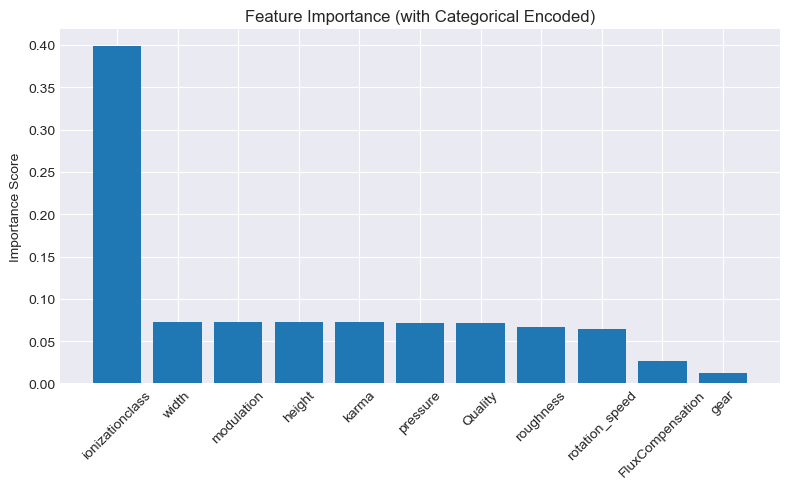

In [38]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = np.array(features)

plt.figure(figsize=(8, 5))
plt.title("Feature Importance (with Categorical Encoded)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


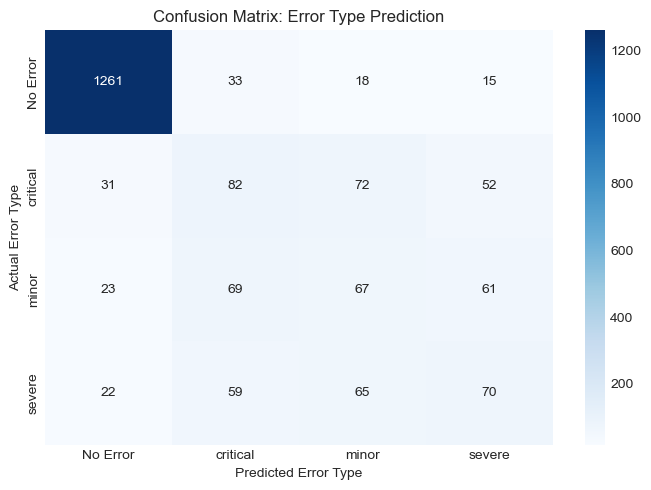

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot with seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=le_target.classes_, 
    yticklabels=le_target.classes_
)
plt.xlabel('Predicted Error Type')
plt.ylabel('Actual Error Type')
plt.title('Confusion Matrix: Error Type Prediction')
plt.tight_layout()
plt.show()


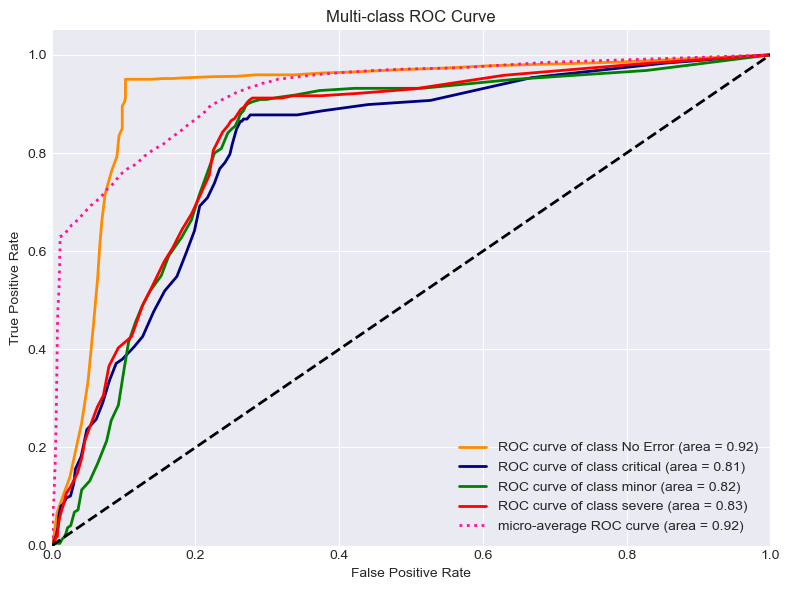

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output for ROC calculation (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=range(len(le_target.classes_)))
y_score = rf.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['darkorange', 'navy', 'green', 'red', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {le_target.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=2, linestyle=':',
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
